In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import os
import random
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, BatchNormalization
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import cv2
from sklearn.metrics import confusion_matrix

In [ ]:
# train_dataset_path = '/content/drive/MyDrive/DATASET A/Train'
# test_dataset_path = '/content/drive/MyDrive/DATASET A/Test'
train_dataset_path = '/content/drive/MyDrive/Dataset A2/Train'
test_dataset_path = '/content/drive/MyDrive/Dataset A2/Test'

In [ ]:
input_shape = (150, 120, 3)
batch_size = 16
epochs =20
num_folds = 5

In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0  # Normalize the image
        images.append(img)
        labels.append(label)
    return images, labels

In [ ]:
healthy_images, healthy_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Healthy MT'), label=0)
lesion_images, lesion_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Lesion MT'), label=1)

images = healthy_images + lesion_images
labels = healthy_labels + lesion_labels

images = np.array(images)
labels = np.array(labels)

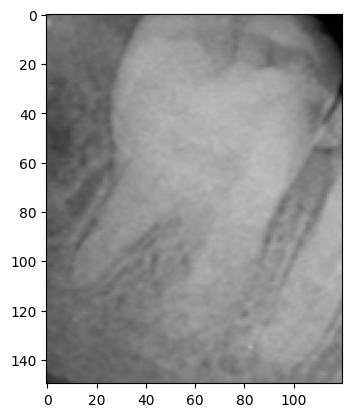

In [ ]:
plt.imshow(images[0])
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

In [ ]:
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, BatchNormalization, Dense, Dropout

def create_model():
    base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalMaxPooling2D(),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def augment_data(image):
    image = np.fliplr(image)
    return image

In [ ]:
# model1 = create_model()
# model1.summary()

Training on Fold 1/5
[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  17  19  20  21
  22  23  24  26  27  28  29  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61
  62  63  64  65  68  69  70  71  72  74  76  77  78  80  81  82  83  84
  85  86  87  88  89  90  91  92  94  95  97  98  99 101 102 103 104 105
 106 107 110 111 112 114 115 116 117 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 137 138 141 142 144 145 146 148 149 150 151
 153 156 157 158 159 160 161 163 164 165 166 167 168 169 171 172 174 175
 179 180 181 182 183 184 186 187 188 190 191 193 195 196 197 198 199 200
 201 202 204 205 206 208 209 210 212 214 216 217]
[  9  15  16  18  25  30  45  55  66  67  73  75  79  93  96 100 108 109
 113 118 119 136 139 140 143 147 152 154 155 162 170 173 176 177 178 185
 189 192 194 203 207 211 213 215]
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7036 - loss: 0.9026 - val_ac

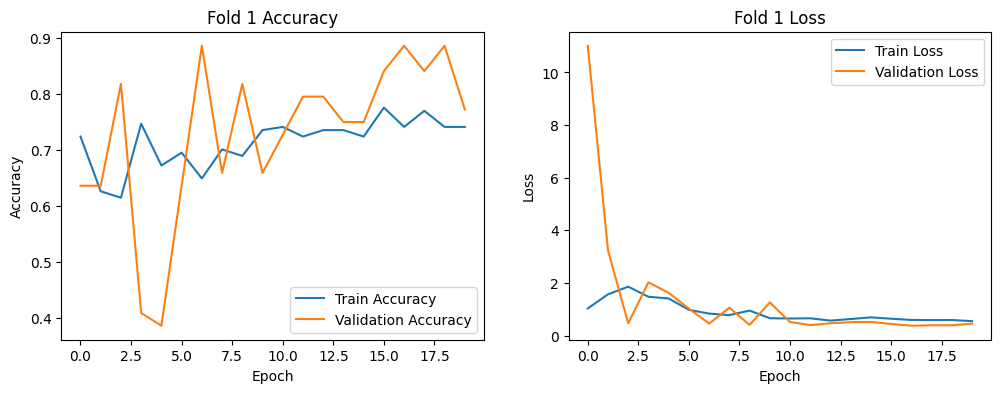

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step - accuracy: 0.7547 - loss: 0.4720
Fold 1 - Validation Accuracy: 0.7727272510528564
Training on Fold 2/5
[  0   1   2   3   4   6   7   8   9  10  11  13  14  15  16  17  18  20
  21  22  23  25  27  30  32  33  34  36  37  39  40  43  44  45  46  47
  48  49  50  52  53  54  55  57  58  59  61  62  63  64  66  67  70  71
  72  73  74  75  77  79  80  81  83  85  87  88  89  90  91  92  93  94
  96  98  99 100 102 103 105 106 107 108 109 110 113 114 115 116 117 118
 119 120 121 123 124 126 127 129 130 131 133 134 135 136 139 140 141 142
 143 145 146 147 149 150 151 152 153 154 155 156 157 158 159 160 162 163
 165 166 168 169 170 171 172 173 174 176 177 178 179 180 181 182 183 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 202 203 204
 205 206 207 209 210 211 212 213 214 215 216 217]
[  5  12  19  24  26  28  29  31  35  38  41  42  51  56  60  65  68  69
  76  78  82  84  86  95  97 101 104 111 112 122 125 128 132 137 138 144
 148

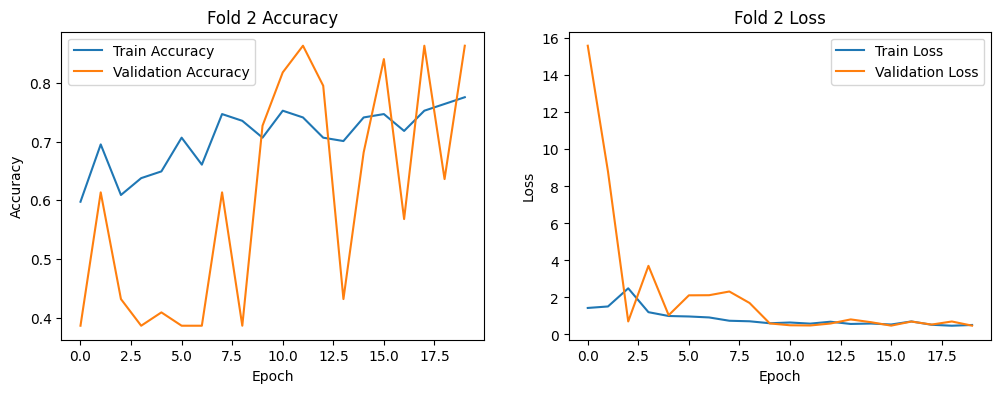

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 635ms/step - accuracy: 0.8674 - loss: 0.5002
Fold 2 - Validation Accuracy: 0.8636363744735718
Training on Fold 3/5
[  1   3   5   7   8   9  12  13  14  15  16  17  18  19  20  21  23  24
  25  26  28  29  30  31  34  35  37  38  39  40  41  42  43  44  45  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  63  65  66  67  68
  69  71  72  73  74  75  76  78  79  80  81  82  83  84  86  87  88  89
  91  92  93  94  95  96  97  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 116 118 119 121 122 123 125 128 129 130 131 132 133 134
 136 137 138 139 140 141 143 144 145 147 148 149 150 151 152 154 155 157
 159 160 161 162 163 164 166 167 169 170 171 173 174 175 176 177 178 179
 180 182 183 184 185 186 187 188 189 190 191 192 193 194 197 198 200 201
 202 203 205 206 207 208 210 211 213 214 215 217]
[  0   2   4   6  10  11  22  27  32  33  36  46  61  62  64  70  77  85
  90  98 114 115 117 120 124 126 127 135 142 146 153 156 158 165 168 172
 181

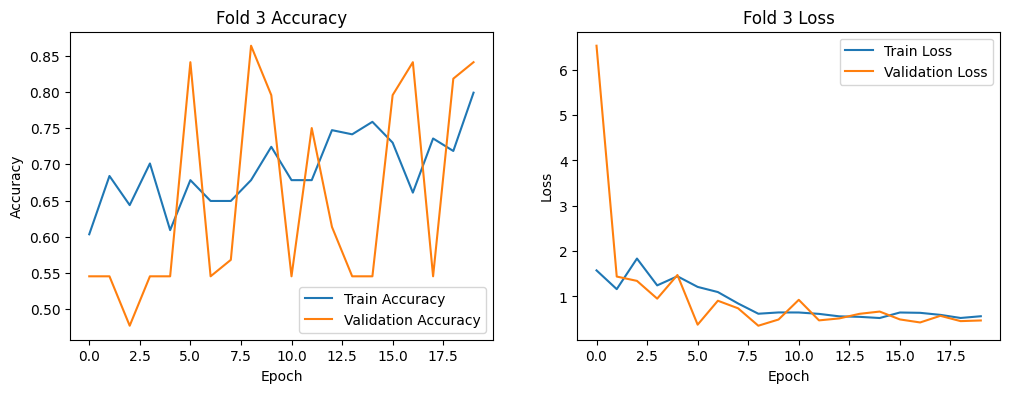

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step - accuracy: 0.8210 - loss: 0.5028
Fold 3 - Validation Accuracy: 0.8409090638160706
Training on Fold 4/5
[  0   1   2   4   5   6   9  10  11  12  14  15  16  18  19  20  21  22
  24  25  26  27  28  29  30  31  32  33  35  36  37  38  41  42  45  46
  48  50  51  52  54  55  56  57  58  60  61  62  63  64  65  66  67  68
  69  70  71  73  74  75  76  77  78  79  82  84  85  86  87  88  90  92
  93  95  96  97  98  99 100 101 102 103 104 106 107 108 109 111 112 113
 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129 130 132 135
 136 137 138 139 140 142 143 144 146 147 148 149 151 152 153 154 155 156
 157 158 160 161 162 164 165 167 168 169 170 172 173 174 175 176 177 178
 179 180 181 184 185 187 188 189 191 192 194 195 196 199 200 201 202 203
 204 205 207 208 209 210 211 212 213 214 215 216 217]
[  3   7   8  13  17  23  34  39  40  43  44  47  49  53  59  72  80  81
  83  89  91  94 105 110 123 131 133 134 141 145 150 159 163 166 171 182


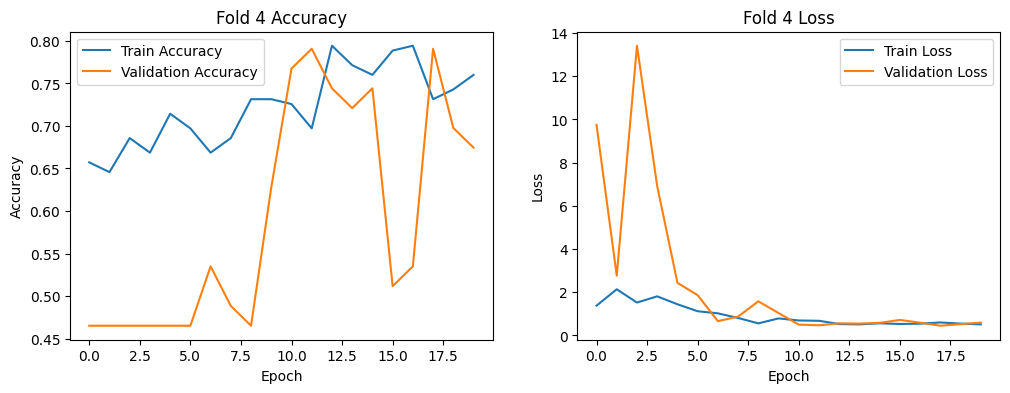

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1000ms/step - accuracy: 0.6371 - loss: 0.6409
Fold 4 - Validation Accuracy: 0.6744186282157898
Training on Fold 5/5
[  0   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39  40
  41  42  43  44  45  46  47  49  51  53  55  56  59  60  61  62  64  65
  66  67  68  69  70  72  73  75  76  77  78  79  80  81  82  83  84  85
  86  89  90  91  93  94  95  96  97  98 100 101 104 105 108 109 110 111
 112 113 114 115 117 118 119 120 122 123 124 125 126 127 128 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 152 153
 154 155 156 158 159 161 162 163 164 165 166 167 168 170 171 172 173 175
 176 177 178 181 182 183 184 185 186 189 190 192 193 194 195 196 197 198
 199 201 203 204 206 207 208 209 211 212 213 215 216]
[  1  14  20  21  37  48  50  52  54  57  58  63  71  74  87  88  92  99
 102 103 106 107 116 121 129 130 149 151 157 160 169 174 179 180 187 188

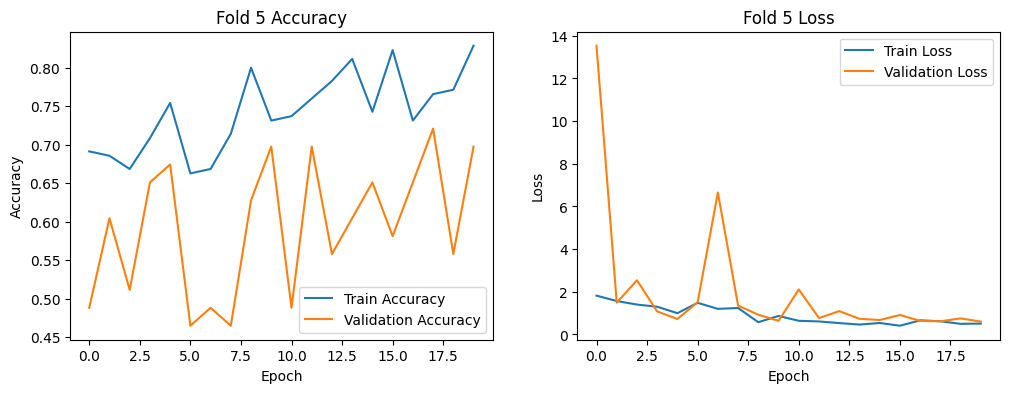

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 568ms/step - accuracy: 0.6839 - loss: 0.6442
Fold 5 - Validation Accuracy: 0.6976743936538696


In [ ]:
fold_accuracies3=[]
for fold, (train_idx, val_idx) in enumerate(kf.split(images)):
    print(f"Training on Fold {fold + 1}/{num_folds}")

    train_images, val_images = images[train_idx], images[val_idx]
    train_labels, val_labels = labels[train_idx], labels[val_idx]
    print(train_idx)
    print(val_idx)

    augmented_train_images = np.array([augment_data(img) for img in train_images])
    val_images = np.array(val_images)


    model3 = create_model()


    history3 = model3.fit(
        augmented_train_images,
        train_labels,
        validation_data=(val_images, val_labels),
        epochs=epochs,
        batch_size=batch_size
    )


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history3.history['accuracy'], label='Train Accuracy')
    plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold + 1} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history3.history['loss'], label='Train Loss')
    plt.plot(history3.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold + 1} Loss')
    plt.legend()
    plt.show()


    val_loss, val_accuracy = model3.evaluate(val_images, val_labels)
    print(f"Fold {fold + 1} - Validation Accuracy: {val_accuracy}")
    fold_accuracies3.append(val_accuracy)

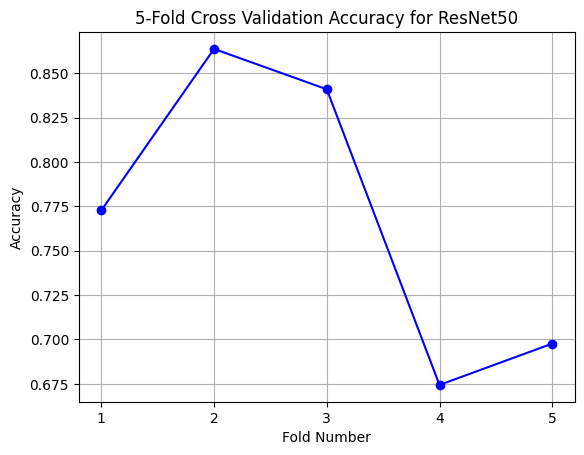

In [ ]:
plt.plot(range(1, 6), fold_accuracies3, marker='o', linestyle='-', color='b')

plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation Accuracy for ResNet50')

plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [ ]:
print(f"\nAverage Validation Accuracy across {num_folds} folds: {np.mean(fold_accuracies3)}")


Average Validation Accuracy across 5 folds: 0.7698731422424316


In [ ]:
test_images = []
test_labels = []

In [ ]:
for class_name in os.listdir(test_dataset_path):
    class_path = os.path.join(test_dataset_path, class_name)
    label = 0 if class_name == "Healthy MT" else 1
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
test_loss3, test_accuracy3 = model3.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy3}")

predictions = model3.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, predicted_classes))
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes, target_names=["Healthy", "Lesion"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.5597
Test Accuracy: 0.8333333134651184
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step

Confusion Matrix:
[[ 9  3]
 [ 1 11]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.75      0.82        12
      Lesion       0.79      0.92      0.85        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



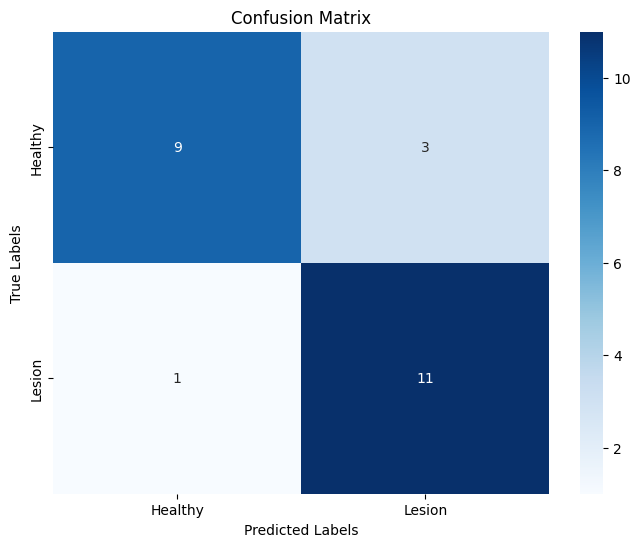

In [ ]:
def plot_confusion_matrix(true_labels, predicted_classes, class_names):
    cm = confusion_matrix(true_labels, predicted_classes)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

plot_confusion_matrix(test_labels, predicted_classes, class_names=["Healthy", "Lesion"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


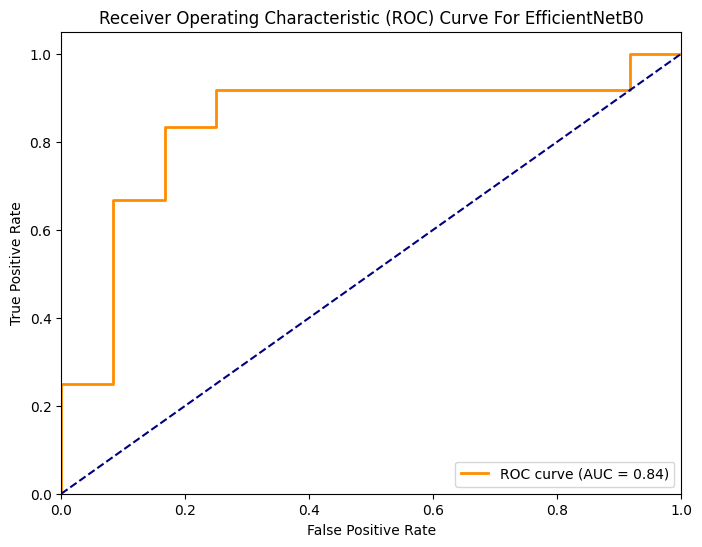

In [ ]:
true_labels = test_labels
predicted_probs = model3.predict(test_images)

def plot_roc_curve(true_labels, predicted_probs):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve For EfficientNetB0')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(true_labels, predicted_probs)